In [1]:
# Loading the required libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.regularizers import l2
import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir(os.getcwd()))
keras.models.load_model(f"./hg_cnn_az_07.keras")


['CNN_Model07_AZ.ipynb', 'hg_cnn_az_07.keras']




ValueError: Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['conv2d/kernel:0', 'conv2d/bias:0']

In [13]:
# Setting the base_path to the images 
base_path = '//Users//aureozanon//Documents//DAAN570//Project//HG_Data//'  # Replace with your actual path to the 'images' directory.

In [14]:
# Resizing all images to a common size of 224x224 pixels.
target_size = (224, 224)

In [15]:
# Initializing the ImageDataGenerator with a validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1  # using 10% of the data for validation (test set)
)

In [16]:
# Creating the training and validation generators
train_generator = train_datagen.flow_from_directory(
    base_path, 
    target_size=target_size,
    batch_size=64,
    class_mode='categorical',
    subset='training' 
)

validation_generator = train_datagen.flow_from_directory(
    base_path, 
    target_size=target_size,
    batch_size=64,
    class_mode='categorical',
    subset='validation' 
)

Found 217789 images belonging to 12 classes.
Found 24193 images belonging to 12 classes.


In [17]:
# Defining the CNN architecture
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3)),
    LeakyReLU(alpha=0.1),
    Conv2D(128, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3)),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, kernel_regularizer=l2(0.001)),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='sigmoid', kernel_regularizer=l2(0.001))
])

In [18]:
# Compiling the CNN model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Training the CNN model
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_generator,
    steps_per_epoch=(train_generator.samples // train_generator.batch_size) + (train_generator.samples % train_generator.batch_size > 0),
    validation_data=validation_generator,
    validation_steps=(validation_generator.samples // validation_generator.batch_size) + (validation_generator.samples % validation_generator.batch_size > 0),
    epochs=15 
)

Epoch 1/15
3403/3403 [==============================] - 8818s 3s/step - loss: 1.2250 - accuracy: 0.6607 - val_loss: 0.6713 - val_accuracy: 0.8679
Epoch 2/15
3403/3403 [==============================] - 8531s 3s/step - loss: 0.5623 - accuracy: 0.8950 - val_loss: 0.4884 - val_accuracy: 0.9152
Epoch 3/15
3403/3403 [==============================] - 7908s 2s/step - loss: 0.4423 - accuracy: 0.9266 - val_loss: 0.4566 - val_accuracy: 0.9232
Epoch 4/15
3403/3403 [==============================] - 8423s 2s/step - loss: 0.3939 - accuracy: 0.9382 - val_loss: 0.4167 - val_accuracy: 0.9289
Epoch 5/15
3403/3403 [==============================] - 8257s 2s/step - loss: 0.3662 - accuracy: 0.9440 - val_loss: 0.3872 - val_accuracy: 0.9349
Epoch 6/15
3403/3403 [==============================] - 8179s 2s/step - loss: 0.3481 - accuracy: 0.9486 - val_loss: 0.3928 - val_accuracy: 0.9292
Epoch 7/15
3403/3403 [==============================] - 9140s 3s/step - loss: 0.3379 - accuracy: 0.9509 - val_loss: 0.3997 -

In [9]:
# Saving the model
model.save('//Users//aureozanon//Documents//DAAN570//Project//Models//hg_cnn_az_07.keras')

In [19]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test accuracy: {test_accuracy*100:.2f}%")

 29/379 [=>............................] - ETA: 10:27 - loss: 2.7642 - accuracy: 0.0539

KeyboardInterrupt: 

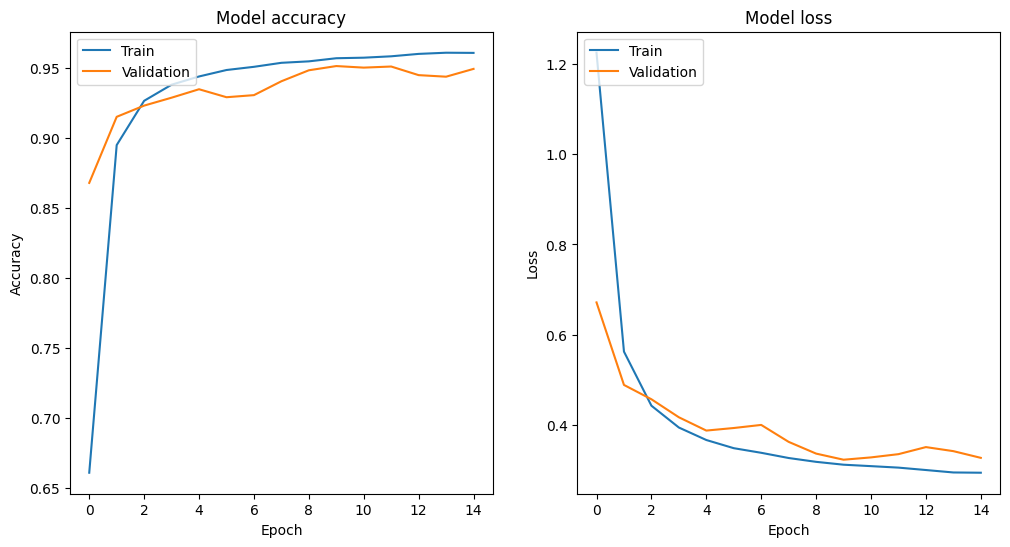

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()